In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import bq_helper
from bq_helper import BigQueryHelper
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [4]:
medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [48]:
# Total nursing facilitins in different States 
query = """SELECT
state, COUNT(state) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  total_facilities DESC;"""
result = medicare.query_to_pandas_safe(query)
print(result.head(10))



  state  total_facilities
0    TX              1200
1    CA              1084
2    OH               936
3    IL               709
4    PA               703
5    FL               688
6    NY               618
7    IN               511
8    MO               497
9    MI               424


In [5]:
# comparison of total claims/day supply/drug cost for each drug

query1 = """SELECT
  generic_name AS drug,
  ROUND(SUM(total_claim_count)) AS total_claim_count,
  ROUND(SUM(total_day_supply)) AS total_day_supply,
  ROUND(SUM(total_drug_cost)) AS total_drug_cost
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  drug
ORDER BY
  total_claim_count DESC;
        """
response = medicare.query_to_pandas_safe(query1)
response_df = response.head(30)
print(response_df.head())


stack1 = go.Bar(
    x=response_df.drug,
    y=response_df.total_claim_count / 1000000.0 ,
    name='Total Claims',
     marker=dict(
        color='rgb(0,36,71)'
    )
)
stack2 = go.Bar(
    x=response_df.drug,
    y=response_df.total_day_supply / 1000000.0,
    name='Total Day Supply',
     marker=dict(
        color='rgb(49,130,189)'
    )
)
stack3 = go.Bar(
    x=response_df.drug,
    y=response_df.total_drug_cost / 1000000.0,
    name='Total Drug Cost',
     marker=dict(
        color='rgb(204,204,204)'
    )
)

data = [stack1, stack2, stack3]
layout = go.Layout(
    barmode='group'
    , margin=dict(b=200)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')



                        drug       ...         total_drug_cost
0       LEVOTHYROXINE SODIUM       ...             830878133.0
1                 LISINOPRIL       ...             277600225.0
2        AMLODIPINE BESYLATE       ...             301541530.0
3                SIMVASTATIN       ...             343294961.0
4  HYDROCODONE/ACETAMINOPHEN       ...             668789113.0

[5 rows x 4 columns]


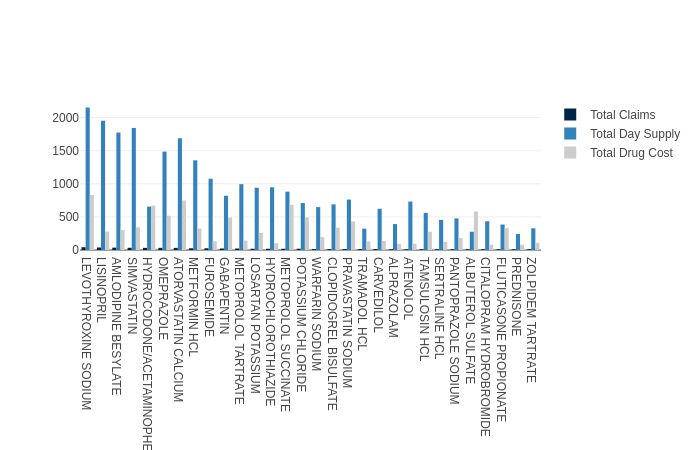

In [33]:
# Finding Specialities with highest claims

query2 = """SELECT
  specialty_description,
  ROUND(SUM(total_claim_count)) AS total_claim_count,
  ROUND(SUM(total_day_supply)) AS total_day_supply,
  ROUND(SUM(total_drug_cost)) AS total_drug_cost
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  specialty_description
ORDER BY
  total_claim_count DESC;
        """
response = medicare.query_to_pandas_safe(query2)
result_df = response.head(10)


print(response_df.head())

stack1 = go.Bar(
    y=result_df.specialty_description,
    x=result_df.total_claim_count/1000000.0,
    name='Total Claims',
    orientation = 'h',
     marker=dict(
        color='rgb(3,81,51)'
    )
)
stack2 = go.Bar(
    y=result_df.specialty_description,
    x=result_df.total_day_supply/1000000.0,
    name='Total Day Supply',
    orientation = 'h',
     marker=dict(
        color='rgb(41,181, 127)'
    )
)
stack3 = go.Bar(
    y=result_df.specialty_description,
    x=result_df.total_drug_cost/1000000.0,
    name='Total Drug Cost',
    orientation = 'h',
     marker=dict(
        color='rgb(112,211,188)'
    )
)

data = [stack1, stack2, stack3]
layout = go.Layout(
    barmode='relative',
    margin=dict(b=50)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

                        drug       ...         total_drug_cost
0       LEVOTHYROXINE SODIUM       ...             830878133.0
1                 LISINOPRIL       ...             277600225.0
2        AMLODIPINE BESYLATE       ...             301541530.0
3                SIMVASTATIN       ...             343294961.0
4  HYDROCODONE/ACETAMINOPHEN       ...             668789113.0

[5 rows x 4 columns]


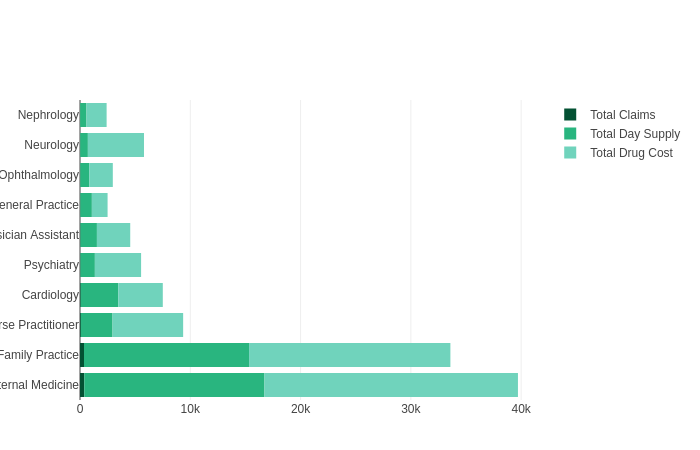